In [6]:
# heart deases dataset , failyre prediction

In [7]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly yellowbrick xgboost nbformat
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [10]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 20.7 MB/s eta 0:00:00


In [12]:
#Loading the Dataset

In [13]:
df=pd.read_csv(r'C:/Users/Asus/Downloads/archive (7)/heart_failure_clinical_records_dataset.csv')

In [14]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [18]:
df.shape

(299, 13)

In [19]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [20]:
#Checking for any missing values

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


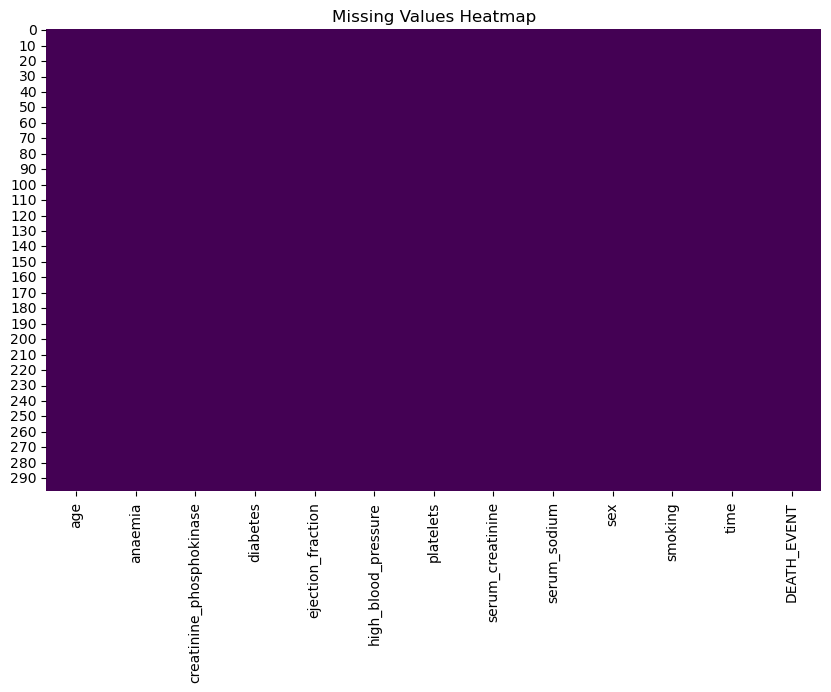

In [21]:
missing_vals = df.isnull().sum()
missing_pct = (missing_vals / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_vals, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Values'] > 0])

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [22]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")


Number of duplicate records: 0


In [23]:
#Plotting the pair plot

In [26]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [40]:
#sns.pairplot(df, hue='Diagnosis')

In [28]:
print(df.columns.tolist())

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


In [31]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']

In [41]:
#for col in numerical_cols:
    #print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

In [42]:
print(df.columns.tolist())

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


In [43]:
# Before
numerical_cols = ['trestbps', 'chol', ...]
# After (if the correct name is 'trtbps')
numerical_cols = ['trtbps', 'chol', ...]

In [44]:
#for col in numerical_cols:
   # print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

In [46]:
print(df.columns.tolist())

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


In [50]:
Data = pd.read_csv(r'C:/Users/Asus/Downloads/archive (7)/heart_failure_clinical_records_dataset.csv')

In [51]:
Data.isnull().sum().sum()

np.int64(0)

In [52]:
Data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [53]:
Data.duplicated().sum()

# check for duplicates values

np.int64(0)

In [54]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


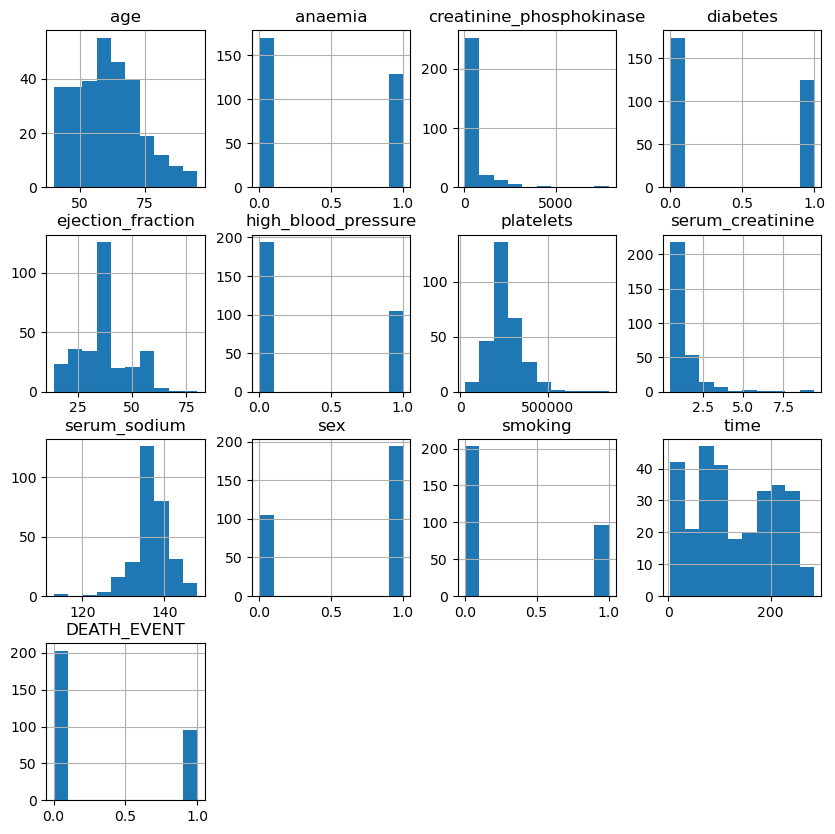

In [55]:
Data.hist(figsize=(10,10))
plt.show()

# explore the data with histgram

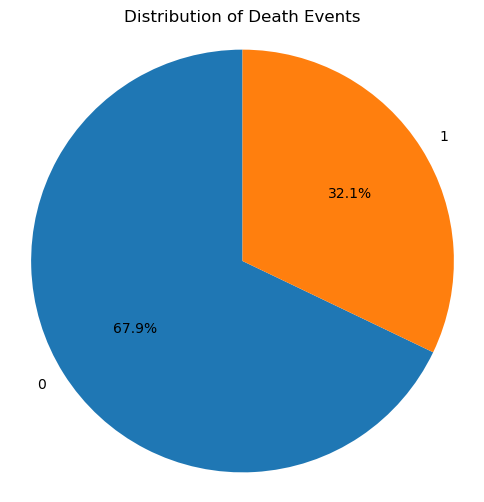

In [56]:

count = Data['DEATH_EVENT'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Death Events')
plt.axis('equal') 
plt.show()

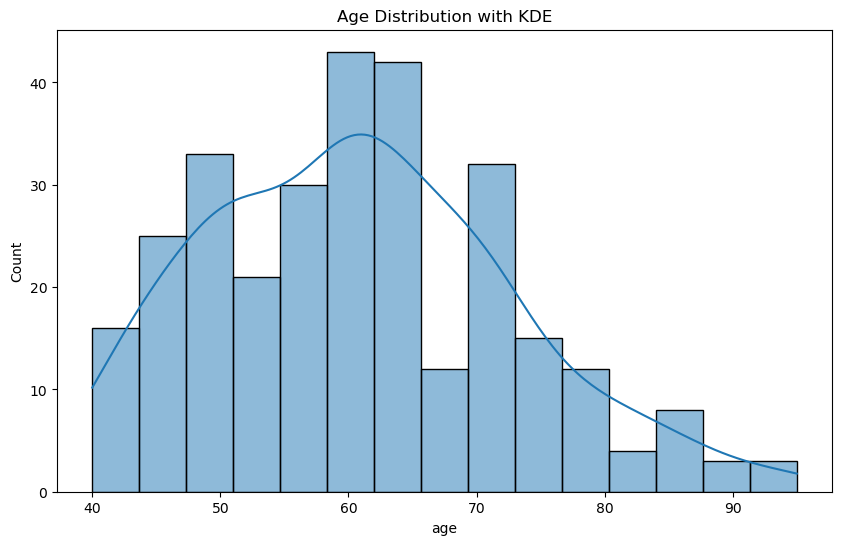

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age',data=Data,kde=True,bins=15)
plt.title('Age Distribution with KDE')
plt.show()

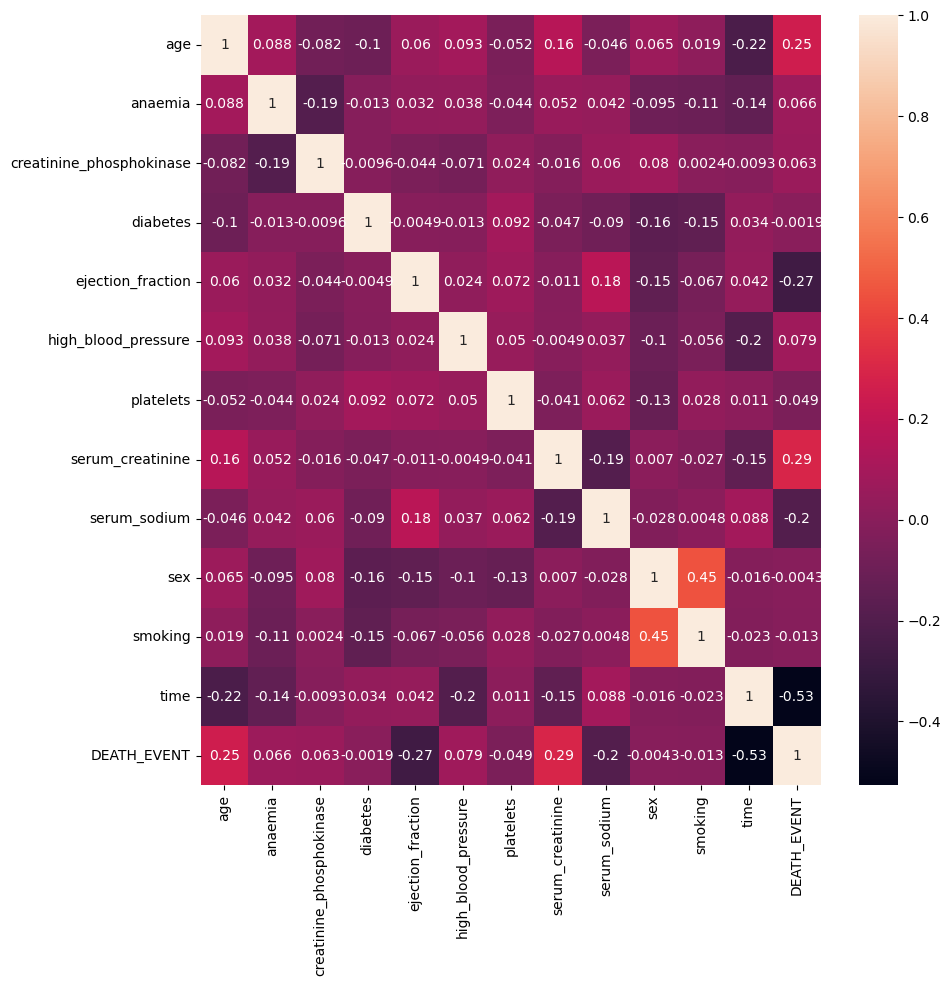

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(),annot=True)
plt.show()

# explore the data with heatmap

In [59]:
x = Data.drop(columns=['DEATH_EVENT'],axis=1)
y = Data['DEATH_EVENT']

In [60]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# split the data

In [61]:
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression()
Model.fit(x_train,y_train)

# train the model

LogisticRegression()

In [62]:
y_pred = Model.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"""The Accuracy : {accuracy * 100:.2f}%""")

# evaluate the model accuracy_score

The Accuracy : 80.00%


In [64]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

# evaluate the model classification report

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        53
           1       0.88      0.59      0.71        37

    accuracy                           0.80        90
   macro avg       0.82      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90



In [65]:
#Heart Failure Prediction¶
#Introduction

#In this project, we aim to predict the likelihood of death due to heart failure using clinical and personal features such as age, blood pressure, serum creatinine, ejection fraction, and more.

#Heart failure is a serious condition where the heart cannot pump enough blood to meet the body’s needs. Early prediction of heart failure outcomes is essential for timely treatment and improved patient care. By using machine learning, we can identify key risk factors and support doctors in making informed clinical decisions.

#We will perform the following steps in this notebook:

#Load and clean the dataset
#Explore and visualize the data
#Train and evaluate machine learning models